3.1 教師なし学習の種類
- 教師なし変換
- クラスタリング

教師なし変換：
- 人や機械学習アルゴリズムにとって理解が容易な形式に変換
- 例：
 - 次元削減：　少量の本質的な特徴を表す特徴量でデータを要約する方法を発見する手法
 - データ構成成分検出：　文書データ集合からのトピック抽出
 
クラスタリング：
- 類似グループ分け（顔写真の自動分類など）

3.2 教師なし学習の難しさ

教師なし学習の利用ケース：
 - 大きな自動システムの一部として使うより、データサイエンティストがデータを理解するために活用
  - （有用性の評価が困難なため（モデルがよくやったのかどうか）(人が見るしかない））
 - 教師あり学習の前処理（教師あり学習の精度向上、省メモリ、時間短縮のため）

3.3 前処理とスケール変換
- 特徴量ごとにスケール変換してずらすことが多い


スケーリングメソッド：
- StandardScaler：　平均0, 分散1（いわゆる標準化）（特徴量の最大値や最小値がある範囲に入ることは保証しない）
- RobustScaler：　上記の平均と分散を、中央値と四分位数にしたもの。外れ値を無視できることが大きな違い。
 - 中央値：　集合の半分がxより大きく、もう半分がxより小さいx。
 - 第一四分位数：　集合の1/4がxより小さく、3/4がxより大きいx。
 - 第三四分位数：　集合の3/4がxより小さく、1/4がxより大きいx。
 - 外れ値：　極端に他の値と異なる値（測定エラーなど）。
- MinMaxScaler：　最小0, 最大1の間にデータを押し込める変換。
- Normalizer：　特徴量ベクトルがユークリッド長1になるように変換（半径1の円周上に投影）（元のユークリッド長で割る）
 -  (特徴量ベクトルの長さではなく方向（角度）だけが問題の場合に使用）


In [1]:
# インポート集
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import os
%matplotlib inline

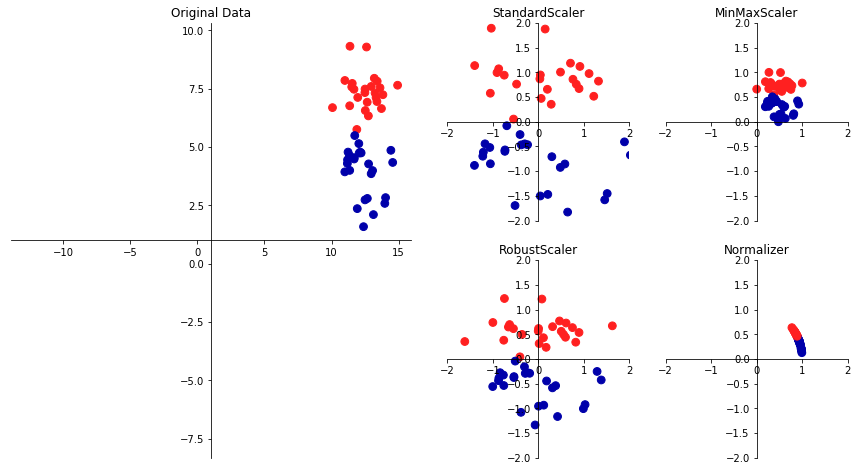

In [2]:
# 前処理サンプル（スケール変換）（特徴量ごとにスケール変換してずらす）
mglearn.plots.plot_scaling()

In [3]:
# -> 2つの特徴量のプロット（x軸：特徴量1, y軸：特徴量2）

In [4]:
# 前処理例（SVC x cancer x MinMaxScaler）
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
d = load_breast_cancer()
ax,ex,ay,ey = train_test_split(d.data, d.target, random_state=1)
print(ax.shape)
print(ex.shape)

(426, 30)
(143, 30)


In [5]:
# -> 形状確認

In [6]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
# スケール変換器の適合（モデルの学習と異なり、スケール変換のfitの引数はaxのみ！）(各特徴量の最小値と最大値を計算)
s.fit(ax)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [7]:
# -> MinMaxScalerはデータを0~1に押し込めることがわかる

In [8]:
# スケール変換（sklearnでは、モデルが新しいデータ表現を返す際には常にtransform）
axs = s.transform(ax)
print(axs.shape)

(426, 30)


In [9]:
# -> スケール変換しても形状は同じ

In [10]:
# 変換前の各列（axis=0)（各特徴量）における最小値、最大値
print("変換前")
print(ax.min(axis=0))
print(ax.max(axis=0))
# 変換後の各列（axis=0)（各特徴量）における最小値、最大値
print("変換後")
print(axs.min(axis=0))
print(axs.max(axis=0))

変換前
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
変換後
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [11]:
# -> 訓練セットでは、各特徴量の最小値、最大値がすべて0、1となっており、
#    全特徴量が同一の0~1のスケールに押し込められたことがわかる

In [12]:
# テストセットexも変換
exs = s.transform(ex)
# 変換後の各列（axis=0)（各特徴量）における最小値、最大値
print(exs.min(axis=0))
print(exs.max(axis=0))

[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [13]:
# -> テストセットでは、0~1に収まっていない。これはスケール変換器が訓練データにfitしているため。
#    （transformは常に訓練データの最小値を引き、訓練データのレンジで割る。）

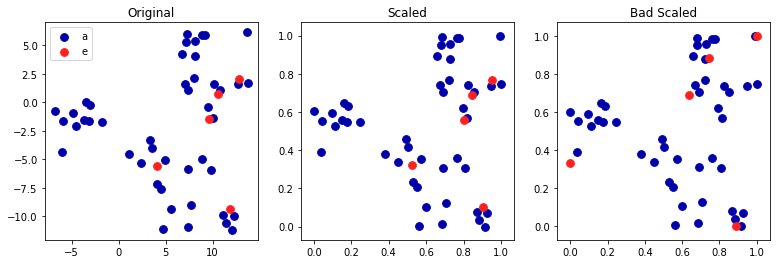

In [14]:
# 訓練データとテストデータで別々に適合＋変換を実行した場合（実際はやってはいけない誤りの例）
from sklearn.datasets import make_blobs
# 合成データ作成
x, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
ax,ex = train_test_split(x, random_state=5, test_size=.1)

# 左図：オリジナルデータ（訓練セットとテストセットをプロット）
f,a = plt.subplots(1, 3, figsize=(13,4))
a[0].scatter(ax[:,0], ax[:,1], c=mglearn.cm2(0), label="a", s=60)
a[0].scatter(ex[:,0], ex[:,1], c=mglearn.cm2(1), label="e", s=60)
a[0].legend()
a[0].set_title("Original")

# 中図：正しいスケール変換（訓練データに適合させた変換器で、訓練データとテストデータを変換。（基準を統一））
s = MinMaxScaler()
s.fit(ax)
axs = s.transform(ax)
exs = s.transform(ex)
a[1].scatter(axs[:,0], axs[:,1], c=mglearn.cm2(0), label="a", s=60)
a[1].scatter(exs[:,0], exs[:,1], c=mglearn.cm2(1), label="e", s=60)
a[1].set_title("Scaled")

# 右図：誤ったスケール変換（訓練データとテストデータで別々に適合＋変換を実行）
#（基準が異なるため、訓練データとテストデータの関係性が崩れることが図から判る））
se = MinMaxScaler()
se.fit(ex)
exs2 = se.transform(ex)
a[2].scatter(axs[:,0], axs[:,1], c=mglearn.cm2(0), label="a", s=60)
a[2].scatter(exs2[:,0], exs2[:,1], c=mglearn.cm2(1), label="e", s=60)
a[2].set_title("Bad Scaled");

In [15]:
# -> 左図：オリジナルデータ。x軸スケールを見ると-5 ~ 10程度まで広がっている。
#    中図：正しいスケール変換後データ。x軸スケールが0~1に収まっている。青点と赤点の位置関係がオリジナルと同様。
#          テストデータ（赤点）のmax,minは0,1になっているわけではないが、それでいいことがわかる。
#    右図：誤ったスケール変換後データ。青点と赤点の関係性が、オリジナルから崩れてしまっているので使えない。

In [16]:
# 省略記法（fitとtransformはまとめて書ける）（下記はすべて同じ）
axs = s.fit(ax).transform(ax)
axs = s.fit_transform(ax)

In [17]:
# SVC x cancer (スケール変換無しでの精度）
from sklearn.svm import SVC
ax,ex,ay,ey = train_test_split(d.data, d.target, random_state=0)
m = SVC(C=100)
m.fit(ax,ay)
print(m.score(ex,ey))

0.6293706293706294


C:\Users\toa\Anaconda3\envs\aidemy3.6\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
# -> 悪い。スケール変換の前処理をしていないため。

In [19]:
# SVC x cancer (スケール変換ありでの精度）
# MinMaxScaler使用（最小0, 最大1）
s = MinMaxScaler()
# 以下共通
s.fit(ax)
axs = s.transform(ax)
exs = s.transform(ex)
m.fit(axs,ay)
print(m.score(exs,ey))

0.965034965034965


C:\Users\toa\Anaconda3\envs\aidemy3.6\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:
# -> はるかに良くなった。スケール変換は非常に有効とわかる。
# 前処理のアルゴリズムを変更したいときは、スケール変換器のクラスを変えるだけでOK（fit、transformは共通）

In [21]:
# SVC x cancer (スケール変換ありでの精度）
# StandardScaler使用（平均0、分散1）
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
# 以下共通
s.fit(ax)
axs = s.transform(ax)
exs = s.transform(ex)
m.fit(axs,ay)
print(m.score(exs,ey))

0.958041958041958


3.4 次元削減、特徴量抽出、多様体学習

教師なし学習によるデータ変換の目的：　
- 可視化
- データ圧縮
- 特徴量抽出：　最適表現の発見。元の表現よりも解析に適した表現を発見。有効なのは画像関連。

教師なし学習によるデータ変換アルゴリズム：

- 主成分分析（PCA：Principal Component Analysis）：　上記全てで最も使用される（可視化、圧縮、特徴量抽出において）
- 非負値行列因子分解（NMF：Non-Negative Matrix Factorization)：　特徴量抽出によく用いられる
- t-SNE：　可視化（2次元散布図）


3.4.1 主成分分析
- データセットの特徴量を、相互に統計的に関連しないように回転する手法
- 回転した特徴量から、データを説明するのに重要な一部の特徴量を抜き出すことが多い
- 教師なしのため、データの相関を見て適切な回転を発見

手順：
1. 最も分散（バラつき）が大きい方向をみつけ、第一成分とする。
 - データはこの方向に対して最も情報を持つ。この方向は、特徴量が最も相互に関係する方向）
2. 第1成分と直行する方向の中から、最も情報を持っている方向を探す。
 - 2次元だと直行する方向は1つだが、高次元だと多い。傾きと大きさだけあれば、矢の向きはどちらでも良い。
3. 最初の主成分をx軸に、2番目の主成分をy軸に沿わせるよう回転させる。
 - 原点の周辺にデータが来るように、回転させる前にデータから平均値を引いてある。
 - 2つの軸の相関は無い（＝データの相関行列は、対角成分以外はゼロ）
4. 必要なら第2主成分を落として次元削減も可能

主成分(Component)：　上記で発見した「方向」のこと。一般的には特徴量の数と同じだけある。

特徴量抽出

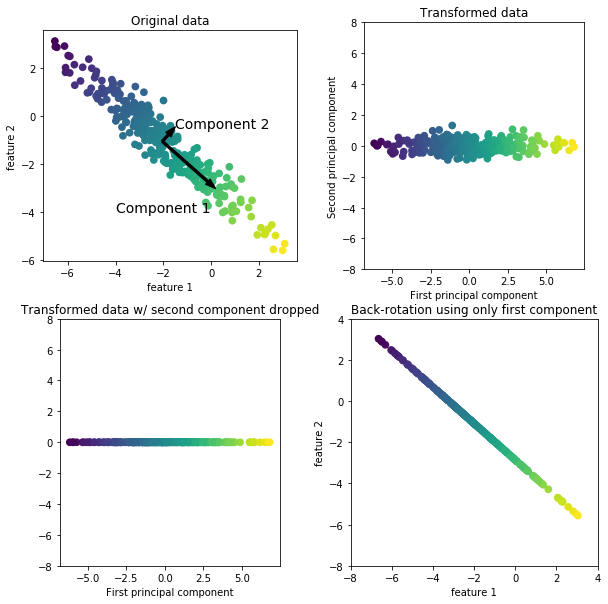

In [22]:
# PCA x 合成2次元データセット(サンプル）
mglearn.plots.plot_pca_illustration()

In [23]:
# -> 左上：　オリジナルデータ。最もバラつきの多い方向を見つけ主成分1（Component1）とし、
#            それに直行する方向の中から最もバラつきの多い方向を主成分2とする（2次元では自明）
#    右上：　変換後データ。最初の主成分をx軸に、2番目の主成分をy軸に沿わせるよう回転させたもの。
#            原点の周辺にデータが来るように、回転させる前にデータから平均値を引いてある。
#            2つの軸の相関は無い（＝データの相関行列は、対角成分以外はゼロ）
#    左下：　変換して第2主成分を落としたデータ。2次元のデータセットを1次元になるよう次元削減した形。
#　　　　　　ただし、元の特徴量のうち1つを残しているのでなく、最も興味深い方向を取り出している。
#    右下：　左下を逆回転して平均値を足して戻したデータ。第1主成分の情報のみを保持。

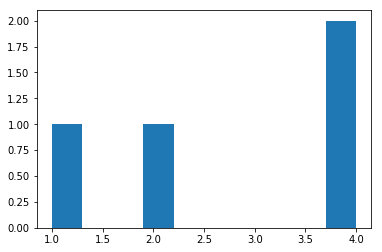

In [24]:
# 確認（ヒストグラム）（numpy配列要素の出現頻度の度数分布表（各レンジに何個値があるか）
plt.hist(np.array([1,2,4,4]));

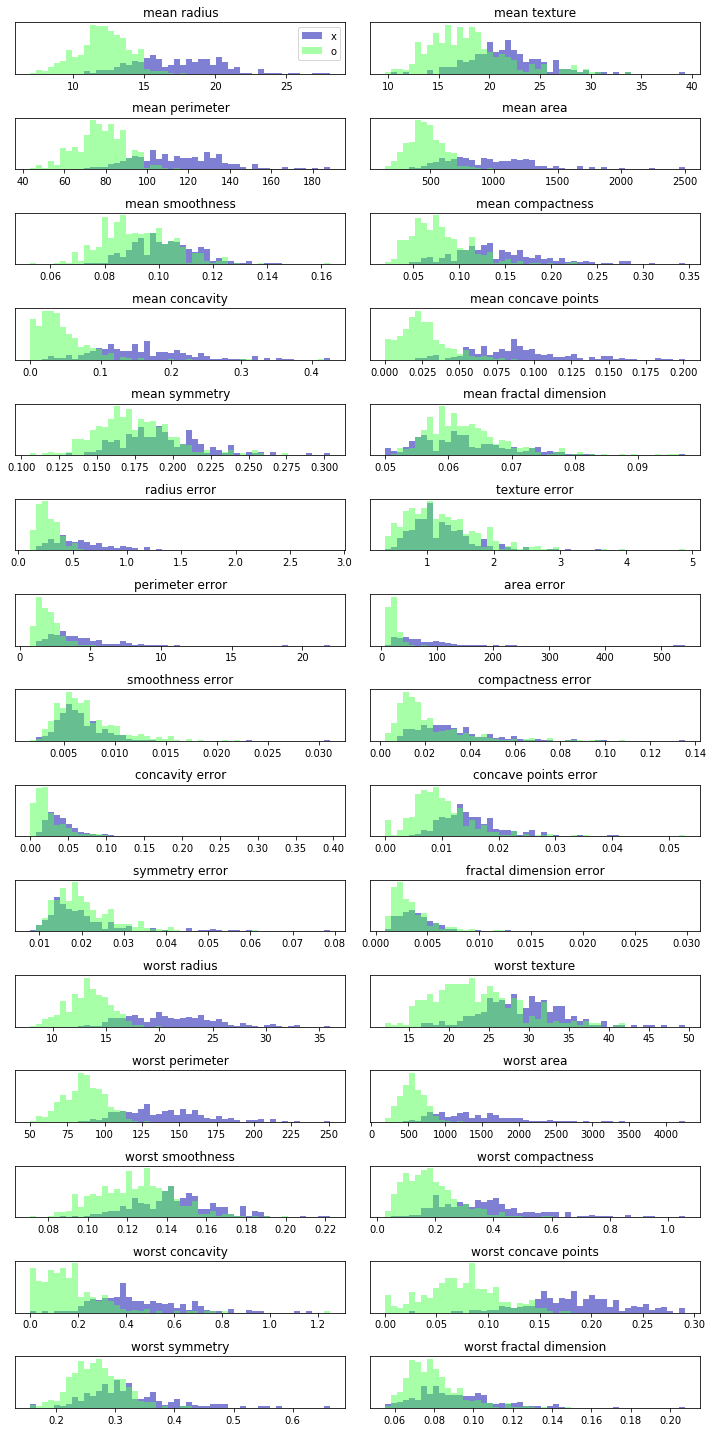

In [25]:
# PCA x cancer (特徴量30と多い) （特徴量ごとに2クラスのヒストグラムを書く（単純な可視化））
f,a1 = plt.subplots(15, 2, figsize=(10,20))
# 良性(o)と悪性(x)を取得
o = d.data[d.target == 1]
x = d.data[d.target == 0]
# サブプロットをフラット化（for文で回すために）
a = a1.ravel()
# 30回繰り返す（30個のグラフを描く）
for i in range(30):
    # ヒストグラムプロット
    _, bins = np.histogram(d.data[:,i], bins=50)
    # 悪性(x)のヒストグラム
    a[i].hist(x[:,i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    # 良性(o)のヒストグラム
    a[i].hist(o[:,i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    # タイトル
    a[i].set_title(d.feature_names[i])
    # y軸を消す
    a[i].set_yticks(())
# 凡例
a[0].legend(["x","o"])
# ぎゅうぎゅう詰めレイアウト
f.tight_layout()


In [26]:
# -> 特徴量が10以上など多いときの可視化に便利
#    良性(緑）と悪性(紫）を分類するために、どの特徴量がキーになりそうか一目でわかる。
#    (symmetry errorは重なっているのでダメ。worst concave pointsは使えそう、など)
#    ただし、特徴量同士の相関や、それが分類に与える影響はわからない。→　PCAで相関見る。

In [27]:
# PCA（相関見る）
# スケール変換（StandardScaler（平均0,分散1））
from sklearn.datasets import load_breast_cancer
d = load_breast_cancer()
s = StandardScaler()
s.fit(d.data)
xs = s.transform(d.data)

In [28]:
# PCA（主成分数=2と指定（デフォルトでは次元はそのまま（回転とシフトだけ）なので、次元削減する際は指定必要））
from sklearn.decomposition import PCA
p = PCA(n_components=2)
p.fit(xs)
xp = p.transform(xs)
# PCA処理前と後の形状確認
print(xs.shape)
print(xp.shape)

(569, 30)
(569, 2)


In [29]:
# -> PCAで30次元が2次元化された(次元削減）

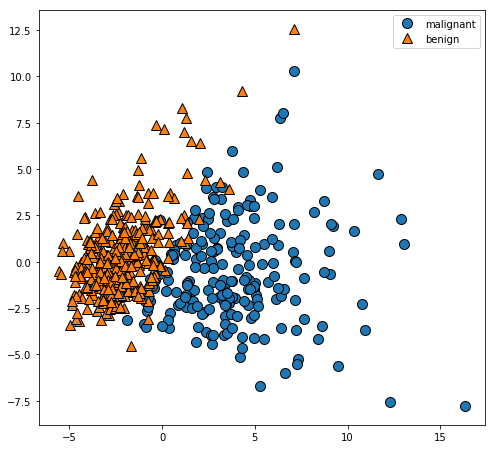

In [30]:
# PCA結果をプロット
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(xp[:,0], xp[:,1], d.target)
plt.legend(d.target_names)
plt.gca().set_aspect("equal")

In [31]:
# -> PCAにより特徴量30のデータセットが2次元の主成分に次元削減され、可視化成功！
#    きれいに分割できているので、線形モデルでもできそうだとわかる。
#    ただし、解釈は困難。（この2次元は主成分であり、元の30の特徴量のどれかではない。）

In [32]:
# 使用した主成分の形状（components_属性）
p.components_.shape

(2, 30)

In [33]:
# -> 各行(2)が主成分2つを表す（上から主成分1, 主成分2）。
# -> 各列(30)が元の特徴量30個を表す。

In [34]:
# 主成分の内容
p.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [35]:
# -> 非常に複雑

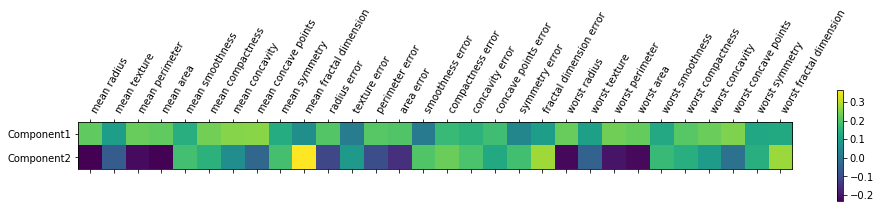

In [36]:
# 主成分のヒートマップ
plt.matshow(p.components_, cmap='viridis')
# カラーバー
plt.colorbar()
# y軸ラベル
plt.yticks([0,1], ["Component1", "Component2"])
# x軸ラベル
plt.xticks(range(len(d.feature_names)), d.feature_names, rotation=60, ha='left');

In [37]:
# -> 主成分1はすべて正だが、正負は無関係。
#    すべての特徴量に一般的な相関があることを表す。（→　ある特徴量が大なら、他の特徴量も大となる）
#    主成分1,2共、全ての特徴量(30)が混ざっている→　説明困難。

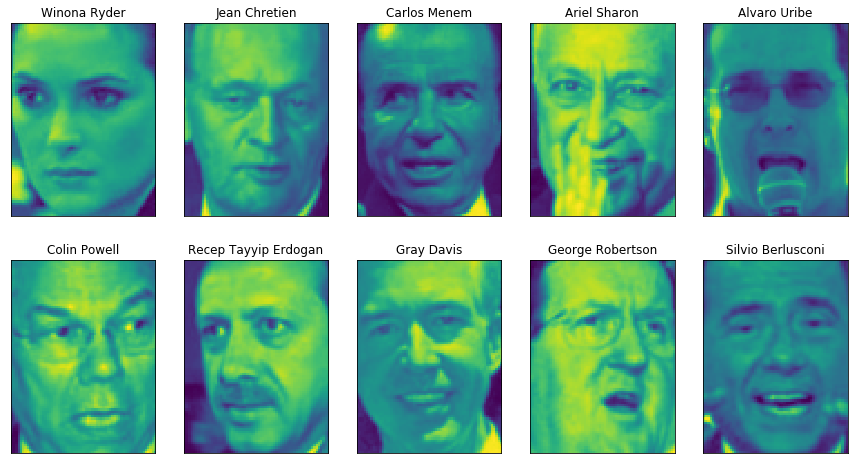

In [38]:
# PCA x 特徴量抽出 x 顔（Labeled Faces in the Wildデータセット）
from sklearn.datasets import fetch_lfw_people
d = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
si = d.images[0].shape
# サブプロット（x軸、y軸ラベルを消去）
f,a1 = plt.subplots(2, 5, figsize=(15,8), subplot_kw={'xticks': (), 'yticks': ()})
for t,i,a in zip(d.target, d.images, a1.ravel()):
    # 画像描画
    a.imshow(i)
    a.set_title(d.target_names[t]);

In [39]:
# データの形状
print(d.images.shape)
# クラスの数（人の数）
print(len(d.target_names))

(3023, 87, 65)
62


In [40]:
# -> 画像：3023枚　サイズ：87x65ピクセル　クラス数(人数）：62

In [41]:
# 各ターゲットの出現回数をカウント
c = np.bincount(d.target)
# カウント数と人名を並べて表示
for i, (c,n) in enumerate(zip(c,d.target_names)):
    print(n,c)
    # 3行ごとに改行
    if (i+1) % 3 == 0: print() 
        

Alejandro Toledo 39
Alvaro Uribe 35
Amelie Mauresmo 21

Andre Agassi 36
Angelina Jolie 20
Ariel Sharon 77

Arnold Schwarzenegger 42
Atal Bihari Vajpayee 24
Bill Clinton 29

Carlos Menem 21
Colin Powell 236
David Beckham 31

Donald Rumsfeld 121
George Robertson 22
George W Bush 530

Gerhard Schroeder 109
Gloria Macapagal Arroyo 44
Gray Davis 26

Guillermo Coria 30
Hamid Karzai 22
Hans Blix 39

Hugo Chavez 71
Igor Ivanov 20
Jack Straw 28

Jacques Chirac 52
Jean Chretien 55
Jennifer Aniston 21

Jennifer Capriati 42
Jennifer Lopez 21
Jeremy Greenstock 24

Jiang Zemin 20
John Ashcroft 53
John Negroponte 31

Jose Maria Aznar 23
Juan Carlos Ferrero 28
Junichiro Koizumi 60

Kofi Annan 32
Laura Bush 41
Lindsay Davenport 22

Lleyton Hewitt 41
Luiz Inacio Lula da Silva 48
Mahmoud Abbas 29

Megawati Sukarnoputri 33
Michael Bloomberg 20
Naomi Watts 22

Nestor Kirchner 37
Paul Bremer 20
Pete Sampras 22

Recep Tayyip Erdogan 30
Ricardo Lagos 27
Roh Moo-hyun 32

Rudolph Giuliani 26
Saddam Hussein 23
S

In [42]:
# -> ブッシュ多すぎw（530回）

In [43]:
# 確認　（np.unique：固有値取り出し）
np.unique([1,2,2,2])

array([1, 2])

In [44]:
# 確認（np.where)
# 引数が1(True)なら0配列、0(False)なら空配列を返す
print(np.where(1))
print(np.where(0))
# 形状はタプル
print(type(np.where(1)))
print()
# 0番目の要素取り出し([0]か[]) 
print(np.where(1)[0])
print(np.where(0)[0])
# 形状はnumpy配列
print(type(np.where(1)[0]))
# 100番目までの全て（[0]で変わらない)
print(np.where(1)[0][:100])

(array([0], dtype=int64),)
(array([], dtype=int64),)
<class 'tuple'>

[0]
[]
<class 'numpy.ndarray'>
[0]


In [45]:
# 確認 （マスクaを試しに作成）
a = np.zeros(10, dtype=np.bool)
print(a) # →　False10個
print()
# 3番目までの全てに1（=Trueになる（dtype=np.boolのため）)を代入
a[np.array([0,1,2,3,4,5])[:3]] = 1 
print(a[np.array([0,1,2,3,4,5])[:3]])
print()
# aを再度確認（3番目までがTrueになっている）
print(a) 

[False False False False False False False False False False]

[ True  True  True]

[ True  True  True False False False False False False False]


In [46]:
# 1人50枚までに制限（ブッシュの特徴ばかり学習しないようにw）
# マスク準備（真偽値）（画像ラベル数と同じ形状(3028,)のFalse配列）（あとでTrueを追加）
b = np.zeros(d.target.shape, dtype=np.bool)
# 画像ラベルから固有値取り出してtとして使用（画像ラベルの固有値＝人数分(62回分)実行）
for t in np.unique(d.target):
    # 画像ラベルが固有値なら、マスクbの1~50番目までの全てに1(=True（dtype=np.boolのため））を代入
    b[np.where(d.target == t)[0][:50]] = 1
# xとyのデータ生成（マスクb使用）
x = d.data[b]
y = d.target[b]
# グレースケール変換（0~255）（数値的に安定）
x = x / 255.

In [47]:
# 顔画像準備（公式GitHubのコピペ）
# データロード
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
si = people.images[0].shape

b = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    b[np.where(people.target == target)[0][:50]] = 1
    
x = people.data[b]
y = people.target[b]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
x = x / 255.

顔認識分類タスク：　
- 1人1クラス
- 1人当たりの画像数が少なくて苦労することが多い
- 新しい人を追加する際に大きなモデルを再訓練するのは大変
- 1-最近傍法が便利（1番近い顔を探すだけ）（1人当たりの画像が1枚あれば機能する）

- ピクセル空間での距離比較は顔の近似度を測る目的には全く不適切。
 - 画像内の対応するピクセル値を比較するだけであり、顔の特徴を捉える効果はない。1ピクセルずれるだけで全然変わる。
 
- PCAが有効
 - whitenオプション：　主成分が同じスケールになるようスケール変換（PCA後にStandardScaler使用と同）（楕円を正円化）
 - 画像データなら、主成分の可視化が容易。主成分は入力空間の方向に対応→　87x65ピクセルの入力画像空間に対応

In [48]:
# 顔認識 x 1-最近傍法
from sklearn.neighbors import KNeighborsClassifier
ax,ex,ay,ey = train_test_split(x, y, stratify=y, random_state=0)
# 1-最近傍法モデル構築
m = KNeighborsClassifier(n_neighbors=1)
m.fit(ax, ay)
print(m.score(ex,ey))

0.23449612403100775


In [49]:
# -> 精度悪い（ただし62クラス分類と考えるとランダムよりはマシ（ランダムなら1/62 = 1.5%))

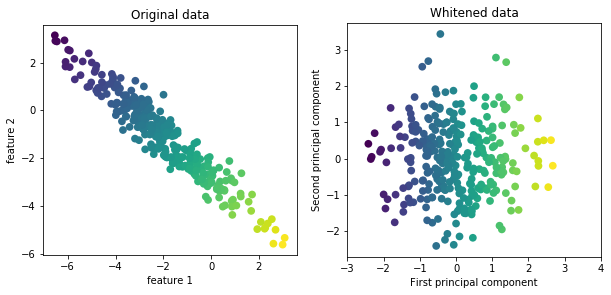

In [50]:
# PCAのwhiteningオプション(サンプル)
mglearn.plots.plot_pca_whitening()

In [51]:
# PCA(whitening)
p = PCA(n_components=100, whiten=True, random_state=0).fit(ax)
axp = p.transform(ax)
exp = p.transform(ex)
# PCA後の訓練データ形状
print(axp.shape)

(1547, 100)


In [52]:
# -> 新しい表現は100の主成分を持つ（特徴量100になる）。

In [53]:
# PCA x 1-最近傍法
m = KNeighborsClassifier(n_neighbors=1)
m.fit(axp,ay)
print(m.score(exp,ey))

0.3062015503875969


In [54]:
# -> 若干上がったが、まだ30%。

In [55]:
# 主成分の形状
p.components_.shape

(100, 5655)

In [56]:
# -> 主成分数100、元の特徴量数5655(=87*65。たてx横の全ピクセル数)

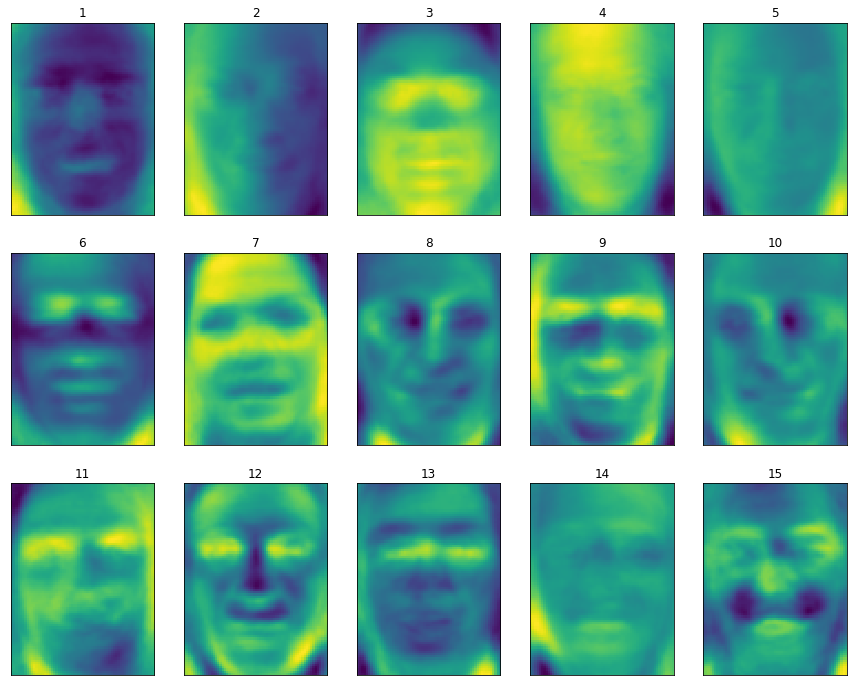

In [57]:
# 主成分プロット
# サブプロット（x軸、y軸ラベル消去）
f,a1 = plt.subplots(3, 5, figsize=(15,12), subplot_kw={'xticks':(), 'yticks': ()})
# 主成分と、フラット化したサブプロットをzipして、インデックスを付けて取り出し
for i, (c, a) in enumerate(zip(p.components_, a1.ravel())):
    # 画像描画
    a.imshow(c.reshape(si), cmap='viridis')
    # タイトル
    a.set_title(i + 1)

In [58]:
# -> 大まかな特徴をつかんでいる

PCAの解釈
- 回転＋次元削減
- もう一つの解釈：　
 - テストデータ点を主成分の重み付き和として表す、一連の数字（回転後の新しい特徴量）を見つける手法
 - 予測画像　＝　x0 * 主成分[0] + x1 * 主成分[1] + ... （各主成分は、上記のようなモヤっとした画像）
 - 使用する主成分のMax：　ピクセル数と同数（5655=87x65)（全く情報を落とさない。）
 
 

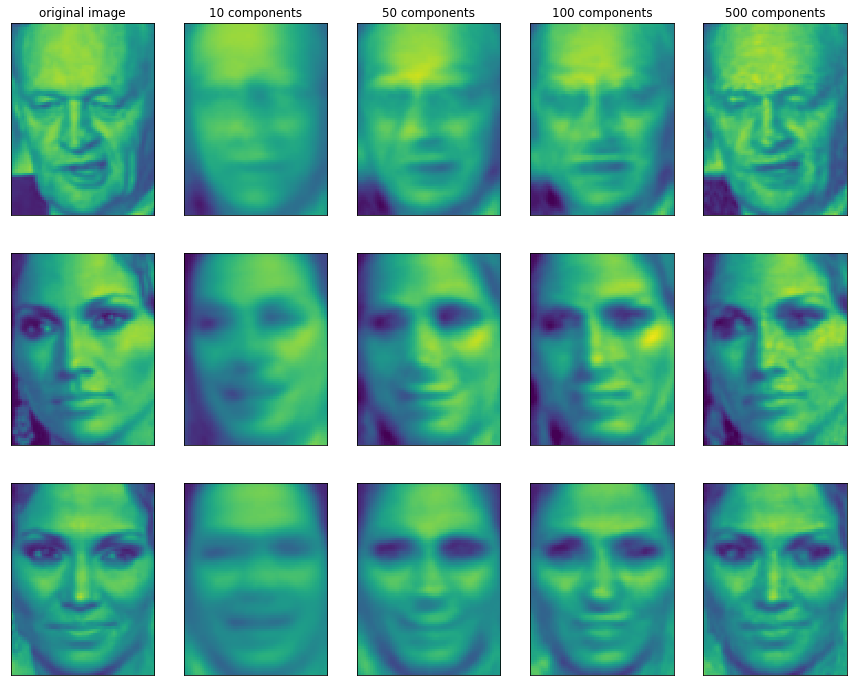

In [59]:
# 主成分のいくつかだけで画像描画
mglearn.plots.plot_pca_faces(ax,ex,si);

In [60]:
# -> 主成分を多く使うほど、元画像に近づく

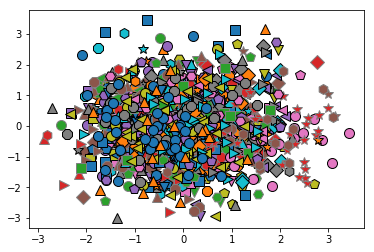

In [61]:
# PCA(全ての顔を最初の2つの主成分だけで散布図プロット)
mglearn.discrete_scatter(axp[:,0], axp[:,1], ay);

In [62]:
# -> 主成分2つだけでは分離不可能。（10個使ってもモヤモヤなので、仕方ない）

3.4.2 非負値行列因子分解(NMF)
- 特徴量抽出のための教師なし学習手法（有用な表現を見つけたい）
- 次元削減可能
- 個々のデータ点をいくつかの成分の重み付き和で表したい（y ≒ wixi + b)
- 係数と成分は非負とする（ゼロ以上）←　特徴量が非負のデータのみ使用可能
- 有効：　いくつもの独立した発生源から得られたデータを重ねたデータ（ex.複数話者の音声データ、多数楽器の音楽データ）
 - 話者ごとの成分を特定可能
- 解釈容易（負の成分や係数があると互いに打ち消しあい理解困難になる）（PCAは解釈困難）
- データが原点(0,0)に対してどの位置にあるかが重要（抽出された非負の成分は、原点からデータへの方向）
- NMFの成分は全てが同等（第一非負成分、などの序列、順番はない）
- 乱数初期化を用いる。（複雑なデータほど、乱数の影響は大きい）
- 画像に用いると、PCAの方がやや画質が良い（PCAは再構成に最適な方向を見つけるため）
  （NMFは、データの興味深いパターンを発見）
- 追加していく構造のデータに最も良く適合（例：　音声データ、遺伝子発現、テキストデータ）
- 個々のデータ点を固定数の成分集合の重み付き和に分解するアルゴリズム：　PCA, NMFの他にもある。
 - sklearnのユーザガイドの独立成分分析(ICA)、因子分析(FA)、スパースコーディング(＝辞書学習）など。
   - http://scikit-learn.org/stable/modules/decomposition.html
  
  
  

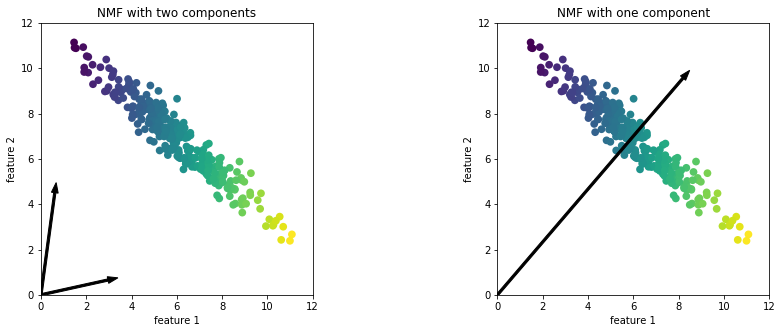

In [63]:
# トイデータ x NMF
mglearn.plots.plot_nmf_illustration()

In [64]:
# -> 左図：　全データが2成分の正係数の重み付き和で表現できる。
#   完全にデータを再現するのに十分な数の成分がある場合（特徴量と同じだけ成分がある場合）、
#   このアルゴリズムはデータの極端な部分の方向を向く
#   右図：　1つしか成分を使わない場合、NMFは、データの平均値へ向かう成分を作る。
#   （この点が最もデータをよく説明するため）
#   成分の数が変わると全く別の成分集合が構成される（PCAはいくつかの成分がなくなる。

In [65]:
# NMF x Labeled Faces in the Wildデータセット
mglearn.plots.plot_nmf_faces(ax,ex,si)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.539869, ..., 0.243137],
       ...,
       [0.043137, ..., 0.593464]], dtype=float32), 
array([[0.237908, ..., 0.267974],
       ...,
       [0.401307, ..., 0.254902]], dtype=float32))


KeyboardInterrupt: 

In [ ]:
# -> 成分が多いほうが画質が良い（当たり前）

In [ ]:
# NMFの成分可視化
from sklearn.decomposition import NMF
# NMF定義（成分数15と指定）
u = NMF(n_components=15, random_state=0)
u.fit(ax)
# 訓練データ、テストデータをNMF変換
axn = u.transform(ax)
exn = u.transform(ex)
# サブプロット
f,a1 = plt.subplots(3, 5, figsize=(15,12), subplot_kw={'xticks':(), 'yticks':()})
# NMFの成分と、フラット化したサブプロットをzipでまとめ、enumerateでインデックスiを付けて取り出し
for i, (c, a) in enumerate(zip(u.components_, a1.ravel())):
    # 画像描画（NMF成分cを、ピクセル数si（たて87 x よこ65の2次元)に整形）
    a.imshow(c.reshape(si))
    # タイトル（成分番号）
    a.set_title(i)

In [ ]:
# -> 成分は全て正なので、PCAの成分よりはるかに顔のプロトタイプを捉えている。

In [ ]:
# 画像のピクセル数(たて87 x よこ65の2次元)
si

In [ ]:
# 元の訓練データ形状（5655＝たて87 x よこ65のピクセル配置）
ax.shape

In [ ]:
# NMF変換後の訓練データ（15成分）
axn.shape

In [ ]:
# 確認 スライスによる逆順ソート
a = np.array([5,7,3])
# スライスによる逆順ソート（-1指定で逆順に並べ替える）
a[::-1]

In [ ]:
# 確認 np.sort、argsort
a = np.array([5,7,3])
# sort（昇順ソート。小さい順に並べ替える）
print(np.sort(a))
# argsort（昇順ソートしたときのインデックス（0始まり。0,1,2,..）を返す）
print(np.argsort(a))

In [ ]:
# 5つ目の成分が強い画像（スキンヘッド風）を表示
cn = 5
# インデックス作成（NMF変換後の訓練データaxnの3成分目（3列目）の値を小さい順にソートしたときの
#                   インデックスを逆順ソート(-1指定)= 3成分目の値を大きい順に並び替えたときのインデックス取得）
inds = np.argsort(axn[:, cn])[::-1]
# サブプロット（2行5列、x軸とy軸ラベルを消す）
f,a1 = plt.subplots(2, 5, figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})
# インデックスと、フラット化したサブプロットをzipでまとめ、enumerateでインデックスiを付けて取り出し
for i, (ind, a) in enumerate(zip(inds, a1.ravel())):
    # 画像描画（訓練データからインデックスで指定した画像を、ピクセル数si（たて87 x よこ65の2次元)に整形）
    a.imshow(ax[ind].reshape(si))

In [ ]:
# -> スキンヘッド風画像が集まった

In [ ]:
# NMF x 音声波形（3信号の混ざった波形を分解し、個々の信号を取り出す）（準備）
# データロード（真の信号s）
s = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(s, '-')
plt.xlabel("time")
plt.ylabel("signal");

In [ ]:
# -> 3信号が混ざった状態（真の信号s）

In [ ]:
# 信号sの次元確認
print("真の信号 s:",s.shape)

In [ ]:
# -> 信号sは3次元（緑、黄色、青の3信号）

In [ ]:
# NMF x 音声波形（真の信号を100計測機器で観測した波形を分解し、個々の信号を取り出す）
# 真の信号sを100計測機器で観測したとして、100次元化する（＝ランダム値を混ぜて100次元化）
# 100行3列のランダム配列A作成
A = np.random.RandomState(0).uniform(size=(100,3))
# 信号sとランダム配列Aの転置の内積を取って100次元のxを作成
x = np.dot(s, A.T)
print("A:",A.shape)
print("A.T:",A.T.shape) # 転置は行列を入れ替えることを確認
print("観測信号 x:",x.shape)

In [ ]:
# NMF定義（3成分指定）
n = NMF(n_components=3, random_state=42)
# NMF変換（100次元のxに）
s_ = n.fit_transform(x)
print(s_.shape)

In [ ]:
# -> NMFで100次元が3次元になった

In [ ]:
# 比較用にPCAも使ってみる
p = PCA(n_components=3)
h = p.fit_transform(x)

In [ ]:
# プロット（3信号）
models = [x, s, s_, h]
names = ['observe x', 'true s', 'NMF', 'PCA']
# サブプロット（4図指定、x軸、y軸ラベルなし）
f,a1 = plt.subplots(4, figsize=(8,4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks':(), 'yticks':()})
# モデルとモデル名とサブプロットをzipでまとめてから取り出す
for m,n,a in zip(models, names, a1):
    # グラフ描画（各モデルで3信号（3列）まで）（observeは100信号あるので3信号だけにする）
    a.plot(m[:,:3], '-')
    # タイトル
    a.set_title(n);

In [ ]:
# -> NMFは観測信号xから真の信号sをよく復元できている（NMFが生成する成分には順番がないため、色が同色なのは偶然）
#    PCAは第一主成分をデータの大きな変動を説明するのに使っており、信号の特定には失敗している

In [ ]:
# プロット（2信号）
# サブプロット（4図指定、x軸、y軸ラベルなし）
f,a1 = plt.subplots(4, figsize=(8,4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks':(), 'yticks':()})
# モデルとモデル名とサブプロットをzipでまとめてから取り出す
for m,n,a in zip(models, names, a1):
    # グラフ描画（各モデルで2信号（2列）まで）（observeは100信号あるので2信号だけにする）
    a.plot(m[:,:2], '-')
    # タイトル
    a.set_title(n);

In [ ]:
# -> NMFは各成分をよく復元できている（見やすい）

3.4.3 t-SNEを用いた多様体学習

多様体アルゴリズム：
- 可視化に有効（PCAも有効だが、回転して方向を落とす性質上、有用性は限られる）
 - 新しい特徴量を2つ生成して利用することが多い。
- 複雑なマッピング
- 特に有用なのがt-SNE
- ただしt-SNEなどは訓練データの変換だけ（テストセットにはできない）
 - t-SNE含む一部は、新たな表現を計算するが、新しいデータを変換することはできない。
- 探索的データ解析に有効
- 教師あり学習の前処理には用いられない

t-SNE：
- データ間距離を可能な限り維持する2次元表現を探す
- デフォルトパラメタで充分なことが多い
 - チューニングパラメタはあるが、効果は大きくない（perplexity, early_exaggeration等）
- 手順：
 1. まずランダムな2次元表現を作る
 2. そこから、元の特徴空間で近いデータ同士を近く、遠いデータ同士を遠く配置
   - どの点が近いか表す情報を維持

In [ ]:
# t-SNE x digitsデータセット（手書き数字。8x8のグレースケール。0~9） x 画像表示
from sklearn.datasets import load_digits
d = load_digits()
# サブプロット
f,a1 = plt.subplots(2, 5, figsize=(10,5), subplot_kw={'xticks':(), 'yticks':()})
# サブプロットと画像をzipして取り出し
for a,i in zip(a1.ravel(), d.images):
    a.imshow(i)

In [ ]:
# t-SNE x digitsデータセット x PCAテキスト散布図
from sklearn.decomposition import PCA
# PCA定義（主成分=2とする）
p = PCA(n_components=2)
p.fit(d.data)
# PCA変換（数値データを最初の2主成分で変形）
dp = p.transform(d.data)
# 10色指定（0~9までの数字を着色）
c = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
     "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
# プロット指定
plt.figure(figsize=(10,10))
# x軸, y軸範囲指定（dpの最小値から最大値まで）
plt.xlim(dp[:,0].min(), dp[:,0].max())
plt.ylim(dp[:,1].min(), dp[:,1].max())
# データ数だけ繰り返し
for i in range(len(d.data)):
    # テキストプロット（位置：　dpのi行目の1列目と2列目、　値：　データのターゲットラベル）
    plt.text(dp[i,0], dp[i,1], str(d.target[i]), color=c[d.target[i]],
            fontdict={'weight': 'bold', 'size': 9})

In [ ]:
# -> PCA：　各データ同士の近さがわかるが（0と6が近いなど）、非常に混じり合っていて分離困難

In [ ]:
# t-SNEの場合（変換器をt-SNEにするだけ）
from sklearn.manifold import TSNE
t = TSNE(random_state=42)
# t-SNEではfit_transformメソッドのみ用いる（transformメソッドが単独でないため）
dt = t.fit_transform(d.data)

# 以下同様
# プロット指定
plt.figure(figsize=(10,10))
# x軸, y軸範囲指定（dpの最小値から最大値まで）
plt.xlim(dt[:,0].min(), dt[:,0].max())
plt.ylim(dt[:,1].min(), dt[:,1].max())
# データ数だけ繰り返し
for i in range(len(d.data)):
    # テキストプロット（位置：　dpのi行目の1列目と2列目、　値：　データのターゲットラベル）
    plt.text(dt[i,0], dt[i,1], str(d.target[i]), color=c[d.target[i]],
            fontdict={'weight': 'bold', 'size': 9});

In [ ]:
# -> t-SNE：　分離が明確。（クラスラベルの知識を全く用いない教師なし学習でこの成果！）（元の空間の点の近さだけで作成）

3.5 クラスタリング

クラスタリング：
- データセットを「似た者同士グループ」（クラスタ）に分割すること
- 出力： クラスタ名（分類タスクと同じ）（ただし分類タスクのように、ラベルに先験的な意味はない）
- 

3.5.1 k-meansクラスタリング

k-meansクラスタリング：
- 最も単純で最も広く用いられているクラスタリングアルゴリズム
- 手順：
 1. 最初だけ重心をランダムに配置
 2. 各データを最寄りのクラスタ重心に割り当てる
 3. クラスタ重心をその点に割り当てられたデータの平均に移動
 4. 2,3の繰り返し（割り当てが動かなくなったら終了）
- 新しいデータ点のクラスタ予測：　最寄りのクラスタ重心のクラスタとする
- PCA, NMFなどの成分分解手法と類似性あり
 - PCA：　最も分散が大きい方向（極端な特徴）を探す
 - NMF：　足し込んでいける成分（部品）を探す

ベクトル量子化：　
- （= k-means）　複数のデータ点を単一点（重心）で表す成分分解手法として見る見方
 - PCA, NMFはデータを複数の成分の和で表現
- 長所：　入力次元数よりはるかに多くのクラスタを使える
 - 例：　三日月データセット（2次元）
   - PCA, NMFは無力（2次元を1次元にするだけ）
   - k-meansは多数のクラスタ重心を用いてより強力な表現を探せる

属性：
- 重心座標：　cluster_centers_（x: [:,0], y: [:,1]）
- ラベル：　labels_（3クラスタなら0,1,2）

長所：
- 理解容易（なのでk-meansでのクラスタリングはよく用いられている）
- 実装容易
- 高速（比較的）
- 大規模データにも対応（sklearnのMiniBatchKMeansはさらに大規模可）

短所：
- 初期化で乱数使用（乱数シードによって結果が変わる）
 - sklearnのデフォルトでは、異なる乱数で10回実行した内の最良（個々のクラスタの分散の和が最小）の結果を返す。
- 複雑な形状（２次元空間などで）のデータは苦手（各クラスタは重心だけで決まる（クラスタは凸型））
 - クラスタ境界は、重心間のちょうど中間に引かれる　→　クラスタ間で疎密の差があると苦手
 - クラスタに対し、全方向が同じように重要であると仮定　→　棒状等、丸以外の形状のデータ集合は苦手
 - （クラスタの形にかなり制約の強い仮定を置いている）
- クラスタ数を先に指定しなければいけない（実問題では不明なことも多い）（続く2つはこれらを改善）


In [ ]:
# k-means（サンプル）
mglearn.plots.plot_kmeans_algorithm()

In [ ]:
# -> k-meansのデータ割り当て(Assign)と重心再設定(Recompute Centers)の繰り返しがわかる

In [ ]:
# k-means境界サンプル
mglearn.plots.plot_kmeans_boundaries()

In [ ]:
# k-means x make_blobsデータセット
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# データロード
x,y = make_blobs(random_state=1)
# kmeans定義（クラスタ数3指定）、実行
k = KMeans(n_clusters=3)
# xに対してfit
k.fit(x)
# xの各値に対するクラスタ割り当て予測
print(k.predict(x))
# モデルのクラスタラベル表示（xに対してfitしたので、xに対する予測結果と同じ）
print(k.labels_)

In [ ]:
# -> k-meansで、xの各値にクラスタラベルが割り当てられた(クラスタ数3を指定したため0,1,2のどれか)
#      2つは同じ

In [ ]:
# データプロット
mglearn.discrete_scatter(x[:,0], x[:,1], k.labels_, markers='o')
# 重心プロット
mglearn.discrete_scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], [0,1,2],
                        markers='^', markeredgewidth=2);

In [ ]:
# クラスタ数変更（3->2)
# kmeans定義（クラスタ数3指定）、実行
k = KMeans(n_clusters=2)
# xに対してfit
k.fit(x)
# データプロット
mglearn.discrete_scatter(x[:,0], x[:,1], k.labels_, markers='o')
# 重心プロット
mglearn.discrete_scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], [0,1],
                        markers='^', markeredgewidth=2);

In [ ]:
# -> 直感的にも分類できていることがわかる

In [ ]:
# k-meansが苦手なケース（疎密の差がある）
xv, yv = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)
yp = KMeans(n_clusters=3, random_state=0).fit_predict(xv)
# データプロット
mglearn.discrete_scatter(xv[:,0], xv[:,1], yp);

In [ ]:
# -> だいたい分類できているが、　緑と青の境界あたりはやや青が多い印象
#      （k-meansの境界線は、重心間のちょうど真ん中に引かれるため。疎密の差があるとこうなる）

In [ ]:
# 確認 棒状データの作り方（散布図形状が棒状になる）
# データロード
x,y = make_blobs(random_state=170, n_samples=600)
# データ次元
print(x.shape)
# データプロット（丸形状）
plt.scatter(x[:,0], x[:,1]);

In [ ]:
# 棒状に変換（ランダム配列作成して内積を取るだけ。内積を取るため形状に注意）
t = np.random.RandomState(74).normal(size=(2,2))
x = np.dot(x, t)
# データプロット（棒形状）
plt.scatter(x[:,0], x[:,1]);

In [ ]:
# k-meansが苦手なケース（棒形状のデータ集合）
x,y = make_blobs(random_state=170, n_samples=600)
r = np.random.RandomState(74)
# データを斜めに引き延ばす
t = r.normal(size=(2,2))
x = np.dot(x, t)
# k-means定義(3クラスタ指定)
k = KMeans(n_clusters=3)
k.fit(x)
yp = k.predict(x)
# データプロット
plt.scatter(x[:,0], x[:,1], c=yp, cmap=mglearn.cm3)
# 重心プロット
plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], marker='^', c=[0,1,2],
           s=100, linewidth=2, cmap=mglearn.cm3);

In [ ]:
# -> 明らかに分類がおかしい（k-meansは重心からの距離しか考慮しないため、丸以外の形状は苦手）

In [ ]:
# k-meansが苦手なケース（三日月形状のデータ集合）
from sklearn.datasets import make_moons
x,y = make_moons(n_samples=200, noise=0.05, random_state=0)
k = KMeans(n_clusters=2)
k.fit(x)
yp = k.predict(x)
# データプロット
plt.scatter(x[:,0], x[:,1], c=yp, cmap=mglearn.cm2, s=60)
# 重心プロット
plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], marker='^',
           c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2);

In [ ]:
# -> 明らかに分類がおかしい（k-meansは重心からの距離しか考慮しないため、丸以外の形状は苦手）

In [ ]:
# 顔画像の準備
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
si = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=np.bool)
for t in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

x = people.data[mask]
y = people.target[mask]
x = x / 255.
                  

In [ ]:
# k-means x 三日月データセット
x,y = make_moons(n_samples=200, noise=0.05, random_state=0)
from sklearn.cluster import KMeans
# k-means定義（クラスタ数10とする）
k = KMeans(n_clusters=10, random_state=0)
k.fit(x)
yp = k.predict(x)
# データプロット
plt.scatter(x[:,0], x[:,1], c=yp, s=60, cmap='Paired')
# 重心プロット
plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], s=60,
           marker='^', c=range(k.n_clusters), linewidth=2, cmap='Paired')
# 元データxの形状（２次元）
print("x : " , x.shape)
# 予測結果ypの形状（1次元。200個のラベル）
print("yp : ", yp.shape)
# 予測結果ypの値
print(yp)

In [ ]:
# -> クラスタ数10としたため、0~9のラベルが割り当てられた。
#     ＝　10成分でのデータ表現が得られた　（割り当てられたクラスの特徴量だけが1、他のはゼロ）
#     ＝　10個の特徴量ができたことになる
#    　この10次元表現を使えば、三日月型でも線形モデルで分離可能（！）（元の２次元では不可能）
#     個々の重心からの距離も特徴量とすればさらに強化。（kmeansのtransformで変形）

In [ ]:
# k-meansによる新しいデータ表現（10次元（１０個の特徴量））
f = k.transform(x)
print(f.shape)
print(f)

3.5.2 凝集型クラスタリング
- ある原則に基づく一連のクラスタリングアルゴリズム
- 各データ点をそれぞれ別のクラスタとして開始し、最も類似した2つのクラスタを併合するのを繰り返す
 - 最初はバラバラな小さいものが、似た者同士で寄り集まっていくイメージ
- 終了条件にクラスタ数を指定
- 新しいデータの予測は、fitと同時に行う（fit_predictを用いる）（単独のpredictメソッドはない）
- いわゆる階層型クラスタリング

連結度（sklearn。既存の2クラスタ間で定義。）：　
 - ward：　
   - デフォルト。
   - 殆どのデータで有効だが、クラスタによってデータ点数が極端に違う場合は他の連結度の方が良い。
   - 併合の際に、クラスタ内の分散の増分が最小になるように2クラスタを選択。
   - 比較的同サイズのクラスタになることが多い。
 - average：　クラスタ間の全ポイント間の距離の平均値が最小の2クラスタを併合。
 - complete：　最大連結度。2クラスタの点間の距離の最大値が最小となるものを併合。

階層型クラスタリング：
- 同じ手続きを繰り返す
- 全ての点は、1点しか含まれていないクラスタから最後のクラスタへ向かう
- 各ステップでクラスタ数は1つずつ減る
- 可視化手法：
 - 凝集型クラスタリングの全過程を重ねて表示：　階層がわかる。ただし2次元データのみ可）
 - デンドログラム：　（＝あみだくじ）（多次元データ可能）
 
デンドログラム：
- 階層型クラスタリングを可視化するもう一つの方法
- scipyで描画可能（sklearnは非サポート）
- scipy：　配列xの連結性配列を計算する関数を提供
- 連結性配列：　階層的なクラスタの連結度がエンコードされている。dendrogram関数に渡す。

短所：
- 複雑な形状は困難（三日月型データセットは無理）（次のDBSCANなら可能）

In [ ]:
# 凝集型クラスタリングの過程（サンプル）
mglearn.plots.plot_agglomerative_algorithm()

In [ ]:
# 凝集型クラスタリングの全過程を重ねて表示（クラスタ内のクラスタがわかる）（サンプル）
mglearn.plots.plot_agglomerative()

In [ ]:
# 凝集型クラスタリング x blobsデータセット
# データロード
from sklearn.cluster import AgglomerativeClustering
x,y = make_blobs(random_state=1)
# 凝集型クラスタリング定義・適合・予測（クラスタ数を3に指定）
ag = AgglomerativeClustering(n_clusters=3)
a = ag.fit_predict(x)
# プロット（クラスを凝集型クラスタリングの予測結果として色塗り）
mglearn.discrete_scatter(x[:,0],x[:,1], a);

In [ ]:
# 確認　グラフに横線入れる
# 現在の軸を取得　（gcaメソッド（get current axis）)
a = plt.gca()
# 境界線作成（get_xbound()　：　x軸に沿う境界線を取得）
b = a.get_xbound()
# 境界線描画（y=3~3、　破線、黒色)（yを変えれば斜めにもなる）
a.plot(b, [3,3], '--', c='k');
#  テキスト描画（x=線の右端位置、　y=3の位置、テキスト「hello」）
a.text(b[1], 3, 'hello', va='center', fontdict={'size': 15});

In [ ]:
#  デンドログラム x blobsデータセット
from scipy.cluster.hierarchy import dendrogram, ward
# データロード（12点作成）
x,y = make_blobs(random_state=0, n_samples=12)
# データ配列xにwardクラスタリング適用し、連結性配列 l 取得
# (ward：　凝集型クラスタリングでのブリッジ距離配列を返す)
l = ward(x)
# 連結性配列 l のクラスタ間距離をデンドログラムとしてプロット
dendrogram(l);

# 現在の軸を取得　（gcaメソッド（get current axis）)
a = plt.gca()
# 境界線作成（get_xbound()　：　x軸に沿う境界線を取得）
b = a.get_xbound()
# 境界線描画（y=7.25~7.25、　破線、黒色)（yを変えれば斜めにもなる）
a.plot(b, [7.25, 7.25], '--', c='k')
a.plot(b, [4, 4], '--', c='k');

#  テキスト描画（x = b[1]（線の右端位置）、　y=7.25の位置、テキスト「two clusters」）
a.text(b[1], 7.25, 'two clusters', va='center', fontdict={'size': 15})
a.text(b[1], 4, 'three clusters', va='center', fontdict={'size': 15})

# x軸ラベル
plt.xlabel("Sample index")
plt.ylabel("Cluster distance");

# xの形状（12行、2列）＝（12点、2次元）
print(x.shape)

In [ ]:
# -> 一番下の点がデータ点（葉）。全12点なので0~11までの番号が振られる。
#      一番近い1と4が最初に結合。次に6と9。
#      一番上の2分岐が一番大きなクラスタ。

#      最も枝が長いのは「three clusters」テキストが示す３分岐の地点。
#   　　　　→　このデータを直感的に分割すると、3分割になりそうなことがわかる。（次点は2分割）
#            （３分岐から２分岐へはかなり離れた点を併合することがわかる）

In [ ]:
# 散布図プロット（デンドログラムで分割した元データ）
mglearn.discrete_scatter(x[:,0],x[:,1]);

In [ ]:
# -> 直感的に3分割になりそうだと確認できる

3.5.3 DBSCAN
- （= Density-Based Spatial Clustering of Applications with Noise）
- クラスタリングアルゴリズムの一つ
- 直訳：　密度に基づくノイズあり空間クラスタリング
- 多くの点が近接しているような高密度(dense)領域に属す点を探す
- 考え方：　クラスタはデータ内で高密度領域を構成しており、比較的疎な領域で区切られているとする
- 何度か繰り返すと、コアポイントとノイズは同じだが、境界ポイントは変わる。
 - 境界ポイントが複数クラスタに属すコアサンプルの近傍の場合、テスト順によってクラスタが変わる。
 - ただし、境界ポイント数はごくわずかなことが多いため、それほど問題にはならない。
- 新しいデータの予測は、fitと同時に行う（fit_predictを用いる）（単独のpredictメソッドはない）

コアサンプル（コアポイント）：　
 - 高密度領域の中のデータ点
 - 定義：　あるデータ点から距離eps以内にmin_samples以上のデータ点があれば、コアサンプルとする。
 
パラメータ：　
- min_samples：
 - データ点をコアサンプルと判断する基準となる最低サンプル数。これ以下ならノイズと判断する。
 - 低密度領域のデータ点がノイズとなるか、独自のクラスタ（コアサンプル）になるかに影響。
 - 最小クラスタのサイズ

- eps：　
 - データ間距離。その距離内にあるデータ点を同一クラスタとする。
 - 重要。データ点が近いことの意味を決定するため。
 - epsが極小→　全データをノイズと判定
 - epsが極大→　全データを1クラスタと判定
 - 暗黙的にクラスタ数を制御することになる
 - 良いepsを見つけるにはスケール変換した方がいい。（全ての特徴量が同じ範囲になるため）     
   （StandardScaler, MinMaxScaler）
   
  
手順：
1. まずランダムに1つのデータ点を選択
2. そこから距離eps以内にある全てのデータ点を見つける。
 - その数がmin_samples以下であれば、その点はどのクラスタにも属さない「ノイズ」とする。
 - min_samples以上であれば、その点を「コアサンプル」とし、新しいクラスタラベルが割り当てられる。
3. 次に、距離eps以内にある全ての近傍点をテストする。
 - それらの点がまだクラスタに割り当てられていない場合、今作ったばかりの新しいラベルを割り当てる
 - 割り当てられている場合、その近傍をさらにテストする。
  - （クラスタからeps以内にコアサンプルが存在しなくなるまで、クラスタは成長を続ける。）
4. まだ調べてない点を探して繰り返す

最終的なデータ点：
- コアポイント：　
- 境界ポイント：　コアポイントから距離eps以内にあるデータ点
- ノイズ：　-1となる（クラスタリング結果を他の配列のインデックスに使用する際は注意！）

長所：
- ユーザがクラスタ数を先験的に与える必要がない（k-means、凝集型の欠点をクリア）
- どのクラスタにも属さない点を判別可能
- 比較的大きいデータセットにも対応
- 複雑な形のデータセットにも対応（三日月型もデフォルトでOK）

短所：
- 遅い（k-means, 凝集型より）



In [ ]:
# DBSCAN x blobsデータセット
from sklearn.cluster import DBSCAN
x,y = make_blobs(random_state=0, n_samples=12)
# DBSCAN定義
db = DBSCAN()
c = db.fit_predict(x)
#  予測結果（クラスタ名）表示
print(c)

In [ ]:
# -> 全て-1（ノイズ）と判定
#      ←　eps, min_samplesのデフォルト設定が、今回の小さいデータセットに対応していないため

In [ ]:
# DBSCAN x パラメータ降ったサンプル
mglearn.plots.plot_dbscan();

In [ ]:
# ->  コアサンプル：　大きいマーカー
#       境界点：　小さいマーカー
#       ノイズ　：　白　

#   eps大（右に行くほど）　→　より多くの点がクラスタに含まれるようになる
#   min_samples大（下に行くほど） →　ノイズ増　（コアポイントが減る（認定基準を満たさない））

#   min_samplesの効果：　左から2番目列の真ん中と下図を比べるとわかる
#    （min_samplesが3→5で1クラスタだけ生き残った）

In [ ]:
# p185　DBSCAN x two_moonデータセット（k-meansや凝集型ではNGだったデータ）
# データロード
from sklearn.datasets import make_moons
x,y = make_moons(n_samples=200, noise=0.05, random_state=0)
# スケール変換（StandardScaler : 平均0、分散1）
s = StandardScaler()
s.fit(x)
xs = s.transform(x)
# DBSCAN定義・適用
db = DBSCAN()
c = db.fit_predict(xs)
# クラスタリング結果プロット
plt.scatter(xs[:,0], xs[:,1], c=c, cmap=mglearn.cm2, s=60);

In [ ]:
# -> 三日月もデフォルトでクラスタリングできた

#      epsをデフォルトの0.5から0.2に減らすと、8つのクラスタができる（多すぎる）（0.7にするとクラスタは1つになる）

3.5.4 クラスタリングアルゴリズムの比較と評価

クラスタリングアルゴリズムの課題：　
- アルゴリズムがどの程度うまく機能したのか判断し、各アルゴリズムの結果を比較することが困難

評価指標（正解データありの場合）：
- クラスタリングアルゴリズムの出力を、正解データクラスタリングと比較して評価する指標
- （実問題では正解データがない場合が多いため、あくまで開発段階で使用）
- （正解データがあるなら教師あり分類すればいい）
- 1が最良、0が関係ないクラスタリング（ARIは負もあり）
- 例：
 - 調整ランド数（Adjusted Rand Index：ARI）：　最も効果的
 - 正規化相互情報量（Normalized Mutual Information：NMI）
- 精度（accuracy_score）は使用してはいけない！
   - 本来、ラベルの数字は0でも1でも関係ない（クラスタリング結果が[0,0,1]でも[1,1,0]でも同じ筈）
   - （どのクラスタにどのデータ点が含まれているかだけが重要）
　 - しかし、精度を使うとクラスタラベルと正解データの数字が完全に一致することを要求される。
   - （ = 誤った数字が出る）

評価指標（正解データなしの場合）：
 - シルエットスコア（シルエット係数）：　
  - クラスタのコンパクトさを計算。大→良い（完全：1）
  - 単にコンパクトさを求めるだけなので、そもそもコンパクトではない複雑なクラスタ形状では不向き。
  - （三日月データセットでは失敗）
 - 頑健性による評価指標
  - データにノイズ付加や、パラメータ変更を行いアルゴリズムを実行し、結果を比較
  - ノイズ付加等でも結果が変わらなければ、信頼性が高いと判断
  - sklearnには未実装
 - シルエットスコアが高くても、頑健でも、ユーザに意味のあるクラスタリングとなっているかは不明
 - 人が実際に目で見るしかない

In [ ]:
# ARI x 3種のクラスタリングアルゴリズムを比較
# データロード（三日月データ）
from sklearn.metrics.cluster import adjusted_rand_score
x,y = make_moons(n_samples=200, noise=0.05, random_state=0)
# スケール変換（StandarScaler（平均0、分散１））
s = StandardScaler()
s.fit(x)
xs = s.transform(x)
# サブプロット（1行4列）
f,a1 = plt.subplots(1, 4, figsize=(15,3), subplot_kw={'xticks':(), 'yticks':()})
# 使用するアルゴリズムのリスト作成（kmeans, 凝集型、DBSCANの3つ）
algos = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
# ランダムクラスタリング作成（3種のアルゴリズムと比較用）（xのサイズで値域0~2のランダム整数配列作成）
r = np.random.RandomState(seed=0)
c0 = r.randint(low=0, high=2, size=len(x))
# 左端の図プロット（比較用として、完全ランダムにクラスタリングした場合をプロット）
a1[0].scatter(xs[:,0], xs[:,1], c=c0, cmap=mglearn.cm3, s=60)
# 左端の図タイトル（ARI）
a1[0].set_title("Random : ARI {:.2f}".format(adjusted_rand_score(y, c0)))
# 右の３図（k-means, 凝集型, DBSCAN）処理
for a, algo in zip(a1[1:], algos):
    # ３種のアルゴリズムで適合＋クラスタリング
    c = algo.fit_predict(xs)
    # クラスタリング結果プロット
    a.scatter(xs[:,0], xs[:,1], c=c, cmap=mglearn.cm3, s=60)
    # タイトル（アルゴリズムオブジェクトから取得したクラス名と、ARI）
    a.set_title("{} : ARI {:.2f}".format(algo.__class__.__name__, adjusted_rand_score(y, c)))

In [ ]:
# -> 今までの結果が網羅されている（k-meansは複雑形状が苦手、DBSCANはOKなど）
#      右図：　ランダムクラスタリングはバラバラ（比較用）
#       ARI　は直感的とも合致（ARI大　→　正確にクラスタリング）

In [ ]:
# 【悪例】　accuracy_scoreで比較
from sklearn.metrics import accuracy_score
# この2つのラベルは同じクラスタリングなので、比較すればスコア100%になるはず
c1 = [0,0,1,1,0]
c2 = [1,1,0,0,1]
# accuracy_score算出
print("accuracy_score : {}".format(accuracy_score(c1, c2)))
# ARI算出
print("ARI : {}".format(adjusted_rand_score(c1, c2)))

In [ ]:
# -> accuracy_scoreは0%だった（数字だけを見ているため）
#      ARIは正しく評価できている。

In [ ]:
# シルエットスコア x 3種のクラスタリング比較　（上記ARIのタイトル部分のスコア表示をシルエットスコアに変えるだけ）
# データロード（三日月データ）
from sklearn.metrics.cluster import silhouette_score
x,y = make_moons(n_samples=200, noise=0.05, random_state=0)
# スケール変換（StandarScaler（平均0、分散１））
s = StandardScaler()
s.fit(x)
xs = s.transform(x)
# サブプロット（1行4列、x軸、y軸ラベルなし）
f,a1 = plt.subplots(1, 4, figsize=(15,3), subplot_kw={'xticks':(), 'yticks':()})
# 使用するアルゴリズムのリスト作成（kmeans, 凝集型、DBSCANの3つ）
algos = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
# ランダムクラスタリング作成（3種のアルゴリズムと比較用）（xのサイズで値域0~2のランダム整数配列作成）
r = np.random.RandomState(seed=0)
c0 = r.randint(low=0, high=2, size=len(x))
# 左端の図（比較用として、完全ランダムにクラスタリングした場合をプロット）
a1[0].scatter(xs[:,0], xs[:,1], c=c0, cmap=mglearn.cm3, s=60)
# 左端の図タイトル（シルエットスコア）
a1[0].set_title("Random : ARI {:.2f}".format(silhouette_score(xs, c0)))
# 右の３図（k-means, 凝集型, DBSCAN）処理
for a, algo in zip(a1[1:], algos):
    # ３種のアルゴリズムで適合＋クラスタリング
    c = algo.fit_predict(xs)
    # クラスタリング結果プロット
    a.scatter(xs[:,0], xs[:,1], c=c, cmap=mglearn.cm3, s=60)
    # タイトル（アルゴリズムオブジェクトから取得したクラス名と、ARI）
    a.set_title("{} : ARI {:.2f}".format(algo.__class__.__name__, silhouette_score(xs, c)))

In [ ]:
# 顔画像準備（公式GitHubのコピペ）
# データロード
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
# 顔画像1枚のデータ形状取得
si = people.images[0].shape # -> (87, 65)

b = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    b[np.where(people.target == target)[0][:50]] = 1
    
x = people.data[b]
y = people.target[b]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
x = x / 255.

In [ ]:
# 顔画像 x ３種のクラスタリング比較
# PCAで生成した100成分の固有顔表現を用いる（生のピクセルより意味的な表現。かつ高速）
from sklearn.decomposition import PCA
p = PCA(n_components=100, whiten=True, random_state=0)
p.fit_transform(x)
xp = p.transform(x)

In [ ]:
# 顔画像 x DBSCAN
# デフォルト設定
db = DBSCAN()
l = db.fit_predict(xp)
print(np.unique(l))

In [ ]:
# -> 全ラベルがノイズになっている（デフォルト設定のため）　→　　eps大か、min_samples小を試す。

In [ ]:
# min_samples=3指定
db = DBSCAN(min_samples=3)
l = db.fit_predict(xp)
print(np.unique(l))

In [ ]:
# -> min_samples=3にしてもダメ。→　eps大

In [ ]:
# eps大
db = DBSCAN(min_samples=3, eps=15)
l = db.fit_predict(xp)
print(np.unique(l))

In [ ]:
# -> eps大とmin_samples小により、ノイズ ＋　1クラスタとなった。何が起こっているか解析。

In [ ]:
# クラスタとノイズのデータ数をカウント（bincountは負の数を許さないので、全てに１足す）
for i,v in zip(np.unique(l), np.bincount(l + 1)):
    print(i, " : ", v)

In [ ]:
# -> ノイズ : 32個、　クラスタ1　：　2031個 
# -> これならノイズを全て見られる

In [ ]:
# ノイズと判断された顔画像を全て可視化
#  ノイズのデータを抽出
n = x[l == -1]
# サブプロット
f,a1 = plt.subplots(3, 9, subplot_kw={'xticks':(), 'yticks':()}, figsize=(12,4))
# 各サブプロットに各画像を配置
for i, a in zip(n, a1.ravel()):
    # 画像描画(顔画像データ i をsi = (87, 65)に整形）
    a.imshow(i.reshape(si)) 

In [ ]:
# -> これらがなぜノイズと判断されたのか？ -> 帽子や手がやスーツが写り込んでいたり、角度がおかしかったり
#      実アプリケーションなら、カメラの角度を直したり、顔だけを切り取るように修正。
#      外れ値検出　：　何かおかしなものを見つける解析

In [ ]:
# クラスタ数を1から増やしたい場合、epsをデフォルト0.5 ~ 15のどこかに設定
# epsの値を振ってクラスタ数を増やしてみる
for e in [1, 3, 5, 7, 9, 11, 13]:
    print(e)
    db = DBSCAN(eps=e, min_samples=3)
    l = db.fit_predict(xp)
    print(np.unique(l))
    print(np.bincount(l + 1))


In [ ]:
# -> eps小　　：　全てノイズ
#      eps=7 ：　大量のノイズと多数のクラスタ
#      eps=11以上 ： 大きいクラスタ1つとノイズ
# -> いずれの場合も大きいクラスタは1つしか見つからない　
# ->　２種類、３種類に大別できるデータではないということ（大体全部同じように似ている or 似ていない）

In [ ]:
# eps=7の多数クラスタを可視化してみる（公式）
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(xp)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images =  np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(x[mask], y[mask], axes):

        ax.imshow(image.reshape(si), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

In [ ]:
# 顔画像 x k-means
# クラスタ数10に設定
k = KMeans(n_clusters=10, random_state=0)
lk = k.fit_predict(xp)
np.bincount(lk)

In [ ]:
# -> 比較的同じサイズで10クラスに分割できている（DBSCANとは違う）

In [ ]:
# クラスタセンタ可視化（各クラスタ内データの重心となる10画像）（k-meansクラスタリング結果） 
# サブプロット
f,a1 = plt.subplots(2, 5, subplot_kw={'xticks':(), 'yticks':()}, figsize=(12,4))
# 重心とサブプロットをzipして取り出し（各subplotに重心割り当て）
for center, a in zip(k.cluster_centers_, a1.ravel()):
    # 画像表示 （PCA変換後の表現をクラスタリングしているため、
    # 重心を元の空間で可視化するには逆変換必要(pca.inverse_transform)
    a.imshow(p.inverse_transform(center).reshape(si), vmin=0, vmax=1)

In [ ]:
# -> それぞれが数十 ~ 300程度の画像の平均値。かつPCA変換もあり、ぼやっとした画像になる（平滑化）

In [ ]:
# 　クラスタセンタと、それに近い画像、遠い画像を描画
mglearn.plots.plot_kmeans_faces(k, p, xp, x, y, people.target_names)

In [ ]:
# 上から4番目は笑っている画像が集まっていてわかりやすい

# 遠い画像が似ていない理由　：　　
#  - k-meansにはDBSCANのようなノイズへのクラスタリングが無く、全てをどこかのクラスタに分類するため。

In [ ]:
# 顔画像 x 凝集型
# クラスタ数10に設定
agg = AgglomerativeClustering(n_clusters=10)
la = agg.fit_predict(xp)
np.bincount(la)

In [ ]:
# -> k-meansと同様、そこそこ均等に分類できている

In [ ]:
# k-meansと凝集型の結果が似ているか、ARIで調べる
adjusted_rand_score(la, lk)

In [ ]:
# -> わずか8%　（＝全然似てない）（k-meansで、遠い画像が似ていなかったのもうなづける）

In [ ]:
# 顔画像 x デンドログラム
# インポート
from scipy.cluster.hierarchy import dendrogram, ward
# データ配列xpにwardクラスタリング適用し、連結性配列 l i取得
# (ward：　凝集型クラスタリングでのブリッジ距離配列を返す)
li = ward(xp)
# 連結性配列 li のクラスタ間距離をデンドログラムとしてプロット
plt.figure(figsize=(20,5))
dendrogram(li, p=7, truncate_mode='level', no_labels=True);
plt.xlabel("Sample index")
plt.ylabel("Cluster distance");

In [ ]:
# 以前のデンドログラムのように、縦線(枝）の長い区間はない
# （わかりやすくいくつかに分割できるようなデータ集合ではないということ）
# （DBSCANで全てが１まとまりのクラスタになってしまったことからもわかる）

In [ ]:
# 40クラスタで試す
agg = AgglomerativeClustering(n_clusters=40)
la = agg.fit_predict(xp)
np.bincount(la)

3.5.5 クラスタリング手法のまとめ
- クラスタリングの適用と評価：　高度に定性的で、データ解析の探索的段階で最も役に立つ。
- 3種全て：
 - 大規模な実問題に適用可能
 - 理解容易（比較的）
 - 多数クラスタへのクラスタリング対応
 - クラスタの粒度を制御する方法を提供
 
- k-means：　
 - クラスタセンタを用いてクラスタの特徴を表す。
 - クラスタ数を明示的に指定
 - 個々のデータポイントがクラスタセンタによって表現される、成分分解手法として考えても良い

- 凝集型：
 - クラスタ数を明示的に指定
 - データの階層的な分割候補を全て提示（デンドログラムで可視化）

- DBSCAN：　
 - epsで近接度を指定　→　暗黙的にクラスタサイズを制御
 - ノイズを検出可能（どのクラスタにも属さない点）
 - クラスタ数を自動決定
 - 複雑な形状でも対応可能（三日月型など）
 - 非常に異なるサイズのクラスタを作る場合がある（長所にも短所にもなる）



3.6 まとめ（教師なし学習）

オススメの演習：
- sklearnのdigits, iris, cancerなど、2次元のトイデータと実世界データへ適用

Estimator：
- sklearnのモデルなどのクラスのこと
- fitメソッド：　全てのクラスにある
- 第一引数：　データx（numpy配列かscipy疎行列）（1行が1データ点）
 - 配列の個々のエントリは連続値（浮動小数点数）
- 教師あり学習では教師ラベルyも必要
 - 1次元のnumpy配列で回帰のターゲット値か、分類（基地の出力ラベルかレスポンス）
- score(ex,ey)メソッド：　教師あり学習には全て、モデルの評価を行う
- 学習モデルの適用方法：
 - predict：　出力yの新しい予測値など（分類、回帰、クラスタリング）
 - transform：　入力xの新しい表現、変換など（前処理、次元削減、特徴量抽出・選択）
 



